In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_excel('ViceVirtual Data.xlsx')
df

,g,gender,income,spent,pc1,pc2,pc3,pc4,gh2,gh1,...,v12,v13,v14,PC_TOTAL,GH_TOTAL,DR_TOTAL,TS_TOTAL,PCS_TOTAL,PCG_TOTAL,V_TOTAL
0,25,1,50000,20000,3,5,4,5,3,4,...,4,4,4,4.25,3.88,3.9,4.19,4.00,4.29,4.43
1,39,2,100000,35000,4,5,3,4,5,4,...,4,4,3,4.00,4.38,4.2,4.00,3.00,3.29,3.21
2,32,1,75000,25000,4,4,4,4,4,5,...,3,4,3,4.00,4.63,4.5,4.50,4.67,4.00,3.50
3,36,1,240000,60000,1,1,1,1,1,1,...,5,5,5,1.00,1.00,1.0,2.00,5.00,5.00,5.00
4,36,2,60000,20000,3,4,4,3,3,4,...,5,5,5,3.50,3.50,3.8,4.19,4.67,4.57,4.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,50,3,100000,30000,5,4,4,5,4,5,...,5,5,4,4.50,4.50,4.4,4.56,4.33,4.00,4.50
396,45,2,120000,35000,5,4,5,4,3,4,...,5,3,4,4.50,4.63,4.5,4.50,4.67,3.86,4.21
397,32,1,50000,15000,4,4,5,4,3,2,...,5,5,4,4.25,4.00,4.4,4.25,4.33,4.14,4.21
398,34,2,65000,15000,4,5,4,4,5,4,...,5,3,4,4.25,4.63,4.4,4.63,5.00,4.00,4.07


In [68]:
df.columns

Index(['g', 'gender', 'income', 'spent', 'pc1', 'pc2', 'pc3', 'pc4', 'gh2',
       'gh1', 'gh3', 'gh4', 'gh5', 'gh6', 'gh7', 'gh8', 'dr1', 'dr2', 'dr3',
       'dr4', 'dr5', 'dr6', 'dr7', 'dr8', 'dr9', 'dr10', 'ts1', 'ts2', 'ts3',
       'ts4', 'ts5', 'ts6', 'ts7', 'ts8', 'ts9', 'ts10', 'ts11', 'ts12',
       'ts13', 'ts14', 'ts15', 'ts16', 'pcs1', 'pcs2', 'pcs3', 'pcg1', 'pcg2',
       '[cg3', 'pcg4', 'pcg5', 'pcg6', 'pcg7', 'v1', 'v2', 'v3', 'v4', 'v5',
       'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'PC_TOTAL',
       'GH_TOTAL', 'DR_TOTAL', 'TS_TOTAL', 'PCS_TOTAL', 'PCG_TOTAL',
       'V_TOTAL'],
      dtype='object')

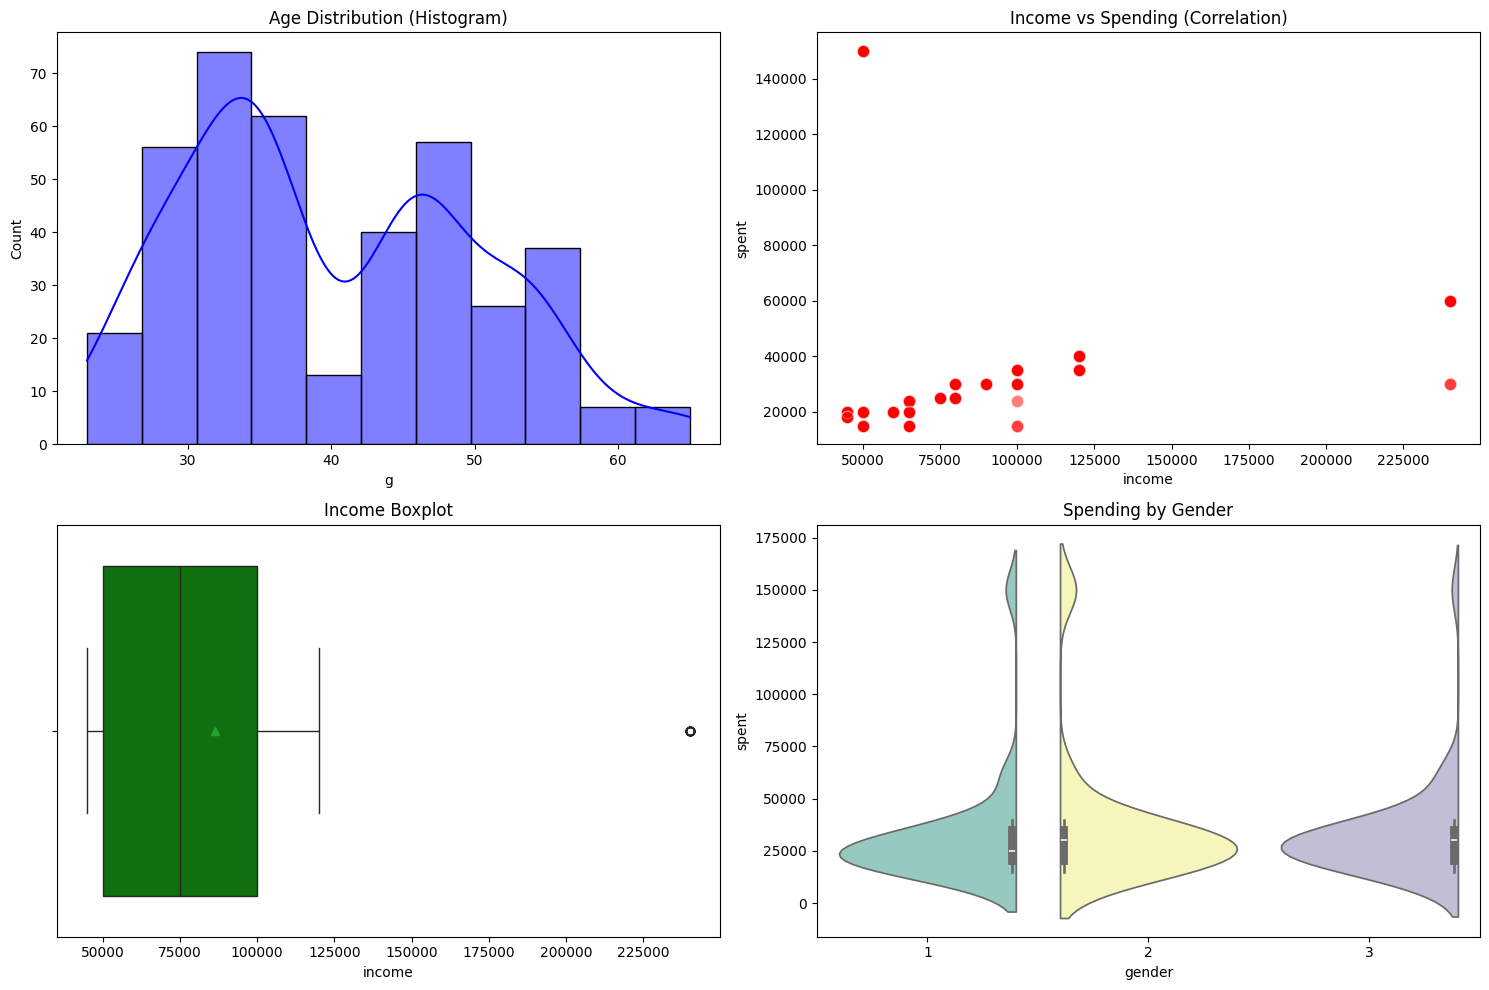

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the age distribution on the first row and column
sns.histplot(df['g'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (Histogram)')

# Plot income distribution on the second row and first column
sns.boxplot(x=df['income'], color='green', showmeans=True, ax=axes[1, 0])
axes[1, 0].set_title('Income Boxplot')

# Create a scatter plot comparing age and spending on the first row and second column
sns.scatterplot(x='income', y='spent', data=df, color='red', alpha=0.5, s=80, ax=axes[0, 1])
axes[0, 1].set_title('Income vs Spending (Correlation)')

# Create a violin plot of spending by gender on the second row and second column
sns.violinplot(x='gender', y='spent', data=df, hue='gender', palette='Set3', split=True, ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Spending by Gender')


plt.tight_layout()
plt.show()

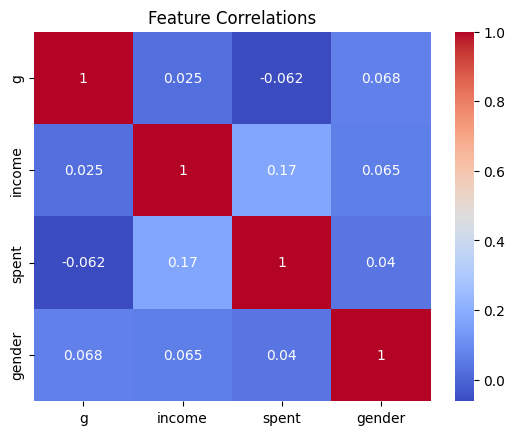

In [70]:
corr_matrix = df[['g', 'income', 'spent', 'gender']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

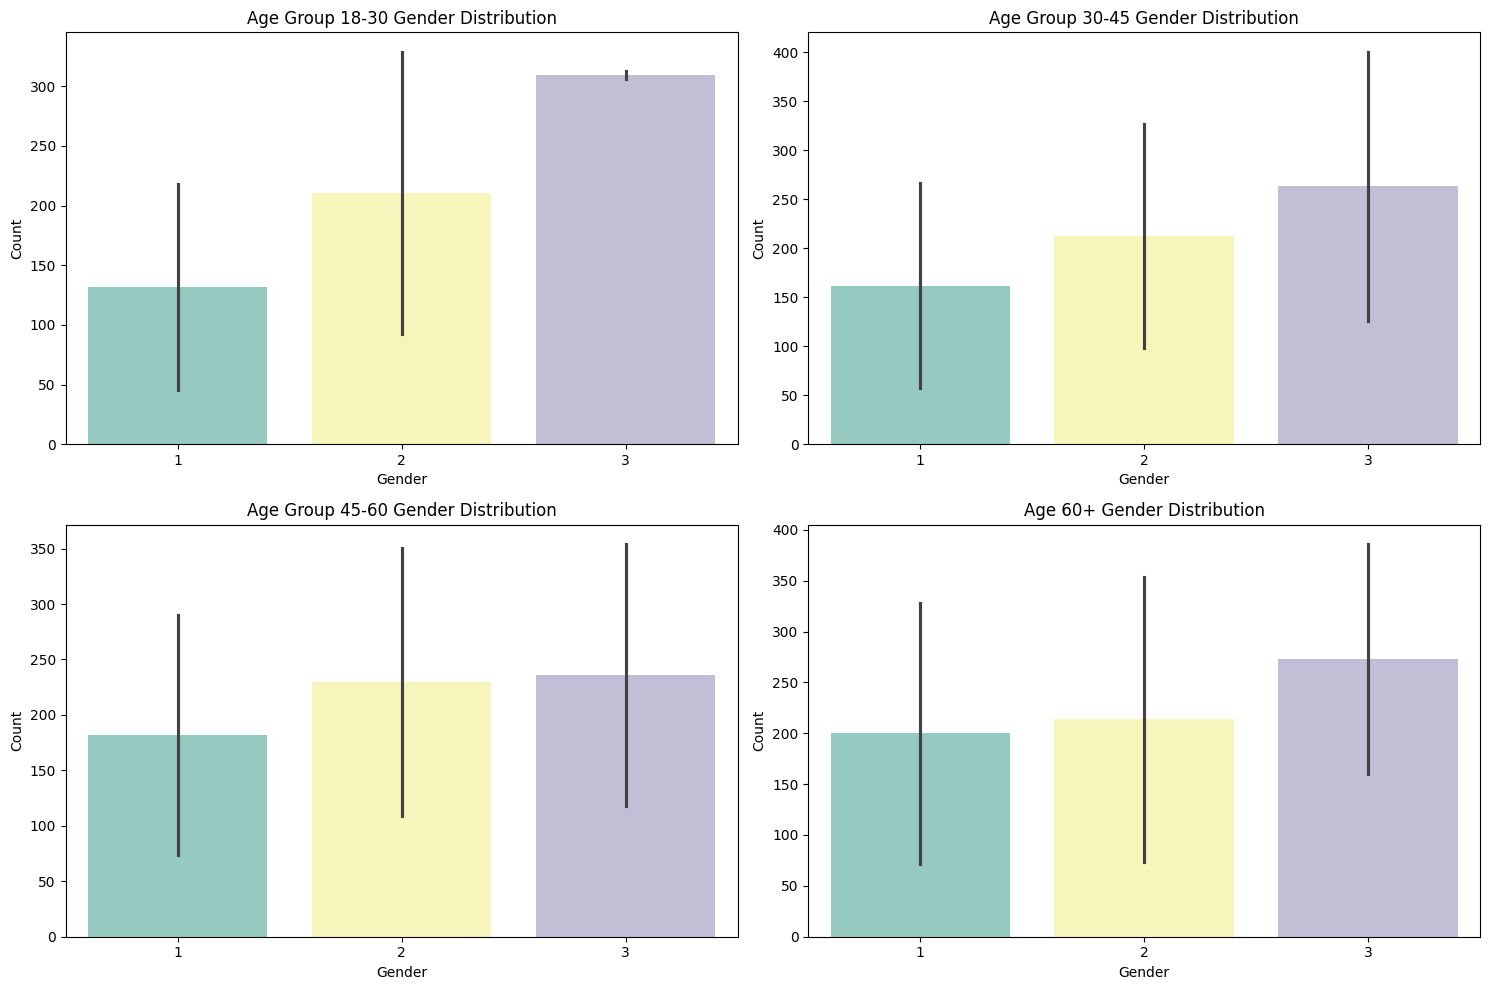

In [71]:
age_groups = [18, 30, 45, 60, np.inf]

# Create a grid of Axes with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (lower_bound, upper_bound) in enumerate(zip(age_groups[:-1], age_groups[1:])):
    # Filter df for the specific age group
    if upper_bound is np.inf:
        # Special case for 60+
        gender_grouped = df[df['g'] >= lower_bound]
        age_label = f'Age 60+'
    else:
        gender_grouped = df[(df['g'] >= lower_bound) & (df['g'] < upper_bound)]
        age_label = f'Age Group {lower_bound}-{upper_bound}'

    # Determine the row and column index for the subplot
    row = i // 2
    col = i % 2

    # Create a bar plot for each age group with the count of males and females
    sns.barplot(x='gender', y=gender_grouped.index, data=gender_grouped, hue='gender', palette='Set3',
                errorbar='sd', ax=axes[row, col], legend=False)
    axes[row, col].set_title(f'{age_label} Gender Distribution')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_xlabel('Gender')

plt.tight_layout()
plt.show()

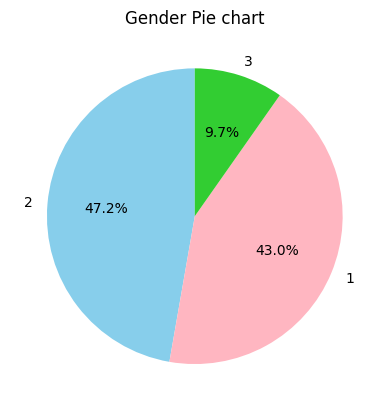

In [72]:
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink', 'limegreen'])
plt.title('Gender Pie chart')
plt.show()

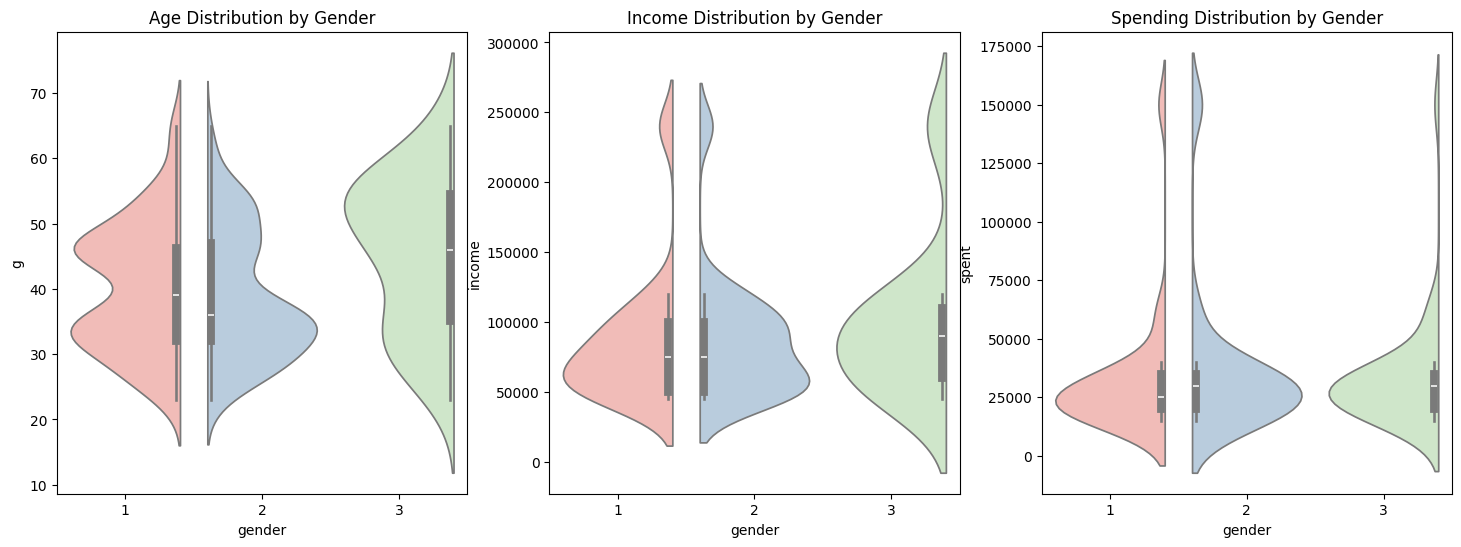

In [73]:
# Violin Plots for Age, Income, and Spending by Gender
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# For age distribution by gender
sns.violinplot(x='gender', y='g', data=df, ax=ax[0], hue='gender', palette='Pastel1', split=True, legend=False)
ax[0].set_title('Age Distribution by Gender')

# For income distribution by gender
sns.violinplot(x='gender', y='income', data=df, ax=ax[1], hue='gender', palette='Pastel1', split=True, legend=False)
ax[1].set_title('Income Distribution by Gender')

# For spending distribution by gender
sns.violinplot(x='gender', y='spent', data=df, ax=ax[2], hue='gender', palette='Pastel1', split=True, legend=False)
ax[2].set_title('Spending Distribution by Gender')

plt.show()

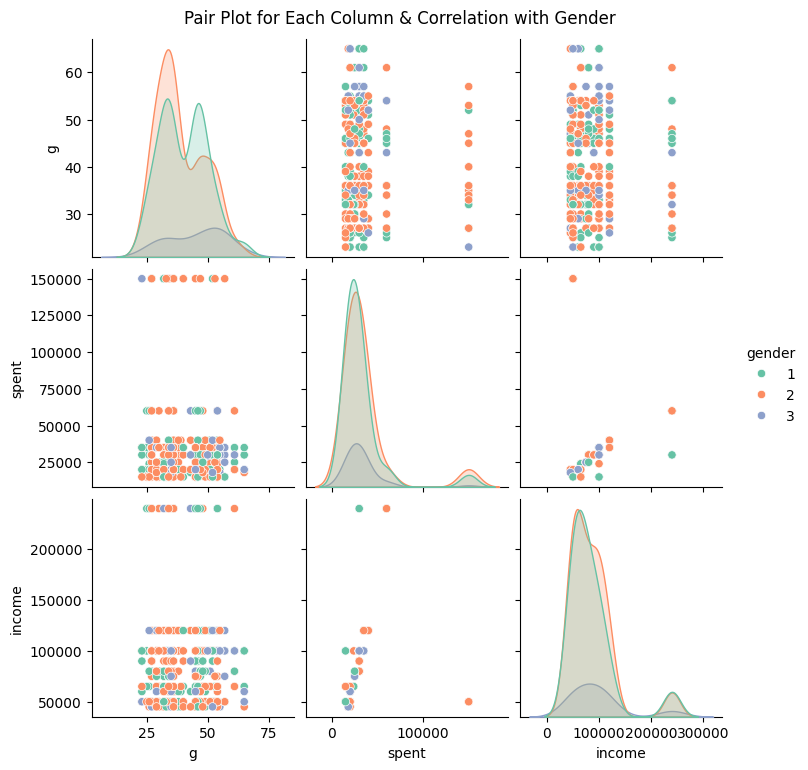

In [74]:
pair_plot = sns.pairplot(df[['g', 'spent', 'income', 'gender']], hue='gender', palette='Set2')
pair_plot.fig.suptitle('Pair Plot for Each Column & Correlation with Gender', y=1.02)  # Adjust y for spacing
plt.show()

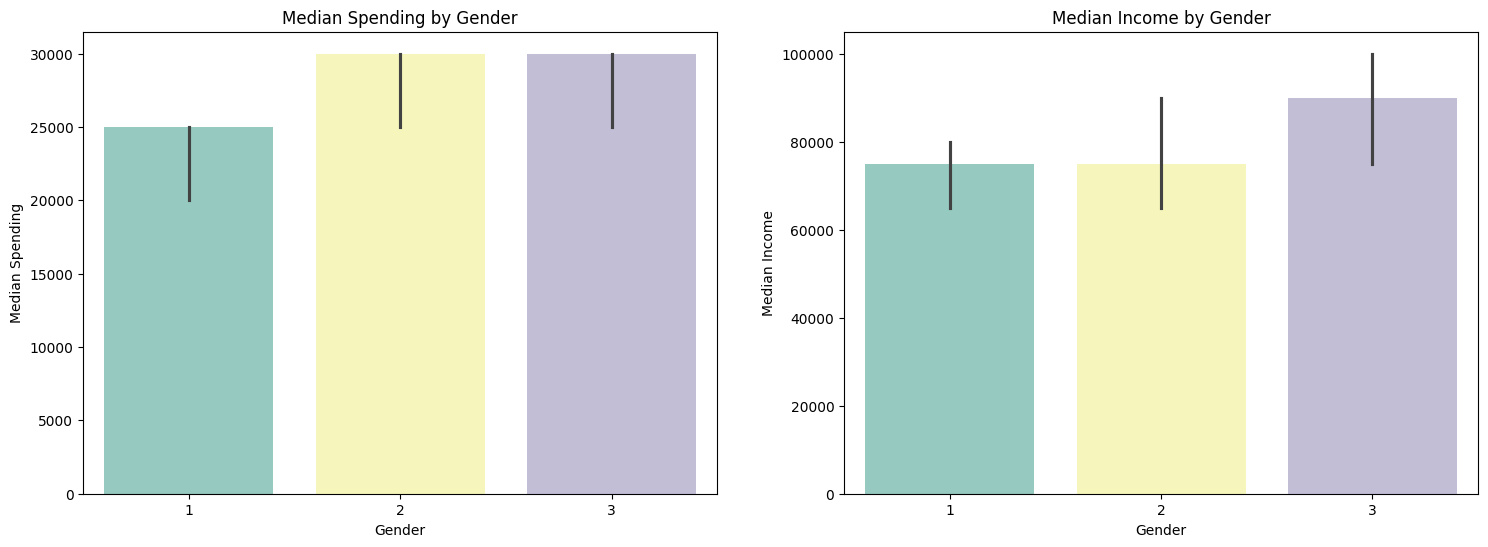

In [75]:
# Categorical Plot for Gender against Spending and Income
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# For Median Spending by Gender
sns.barplot(x='gender', y='spent', data=df, estimator=np.median, hue='gender', palette='Set3', ax=ax[0], legend=False)
ax[0].set_title('Median Spending by Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Median Spending')

# For Median Income by Gender
sns.barplot(x='gender', y='income', data=df, estimator=np.median, hue='gender', palette='Set3', ax=ax[1], legend=False)
ax[1].set_title('Median Income by Gender')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Median Income')

plt.show()